# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [3]:
df = pd.read_csv('spotify_churn_dataset.csv')
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


### Explore The Dataset

In [4]:
df.shape

(8000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [6]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [7]:
df.nunique()

user_id                  8000
gender                      3
age                        44
country                     8
subscription_type           4
listening_time            290
songs_played_per_day       99
skip_rate                  61
device_type                 3
ads_listened_per_week      46
offline_listening           2
is_churned                  2
dtype: int64

## Exploratory Data Analysis

In [8]:
df.isna().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.fillna(0, inplace=True)
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


## Visualization

In [11]:
num_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']
cat_cols = ['gender', 'country', 'subscription_type', 'device_type']

print(len(num_cols))
print(len(cat_cols))

7
4


In [14]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

### 1. Histogram Of Num_Cols

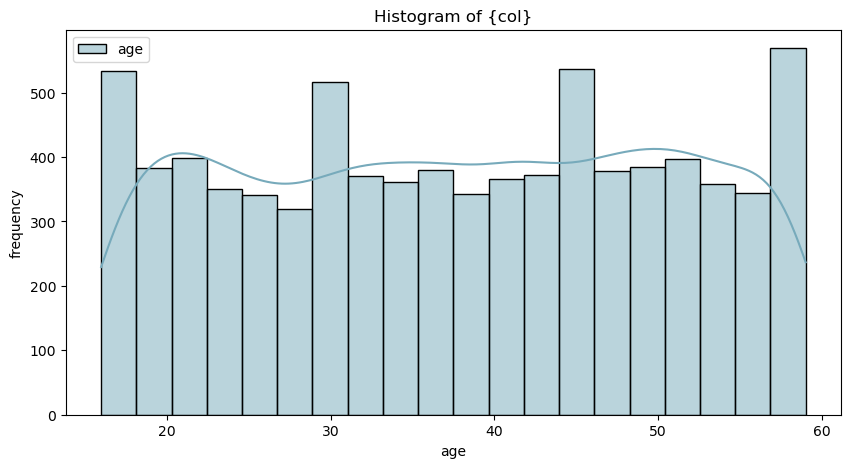

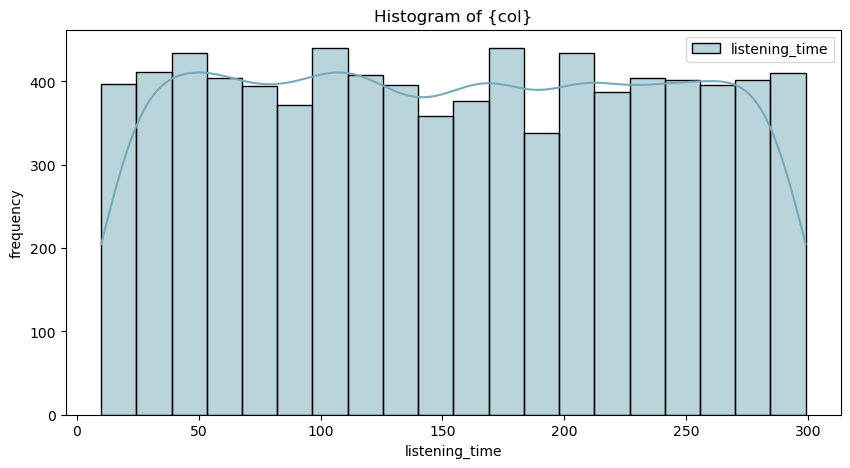

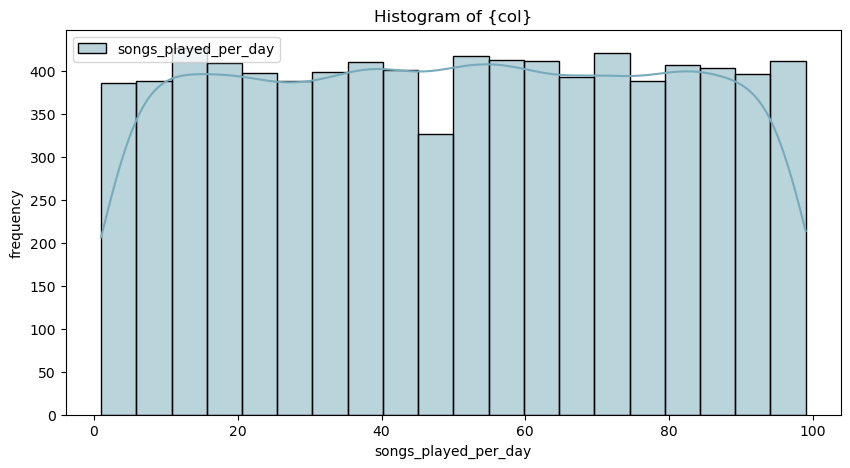

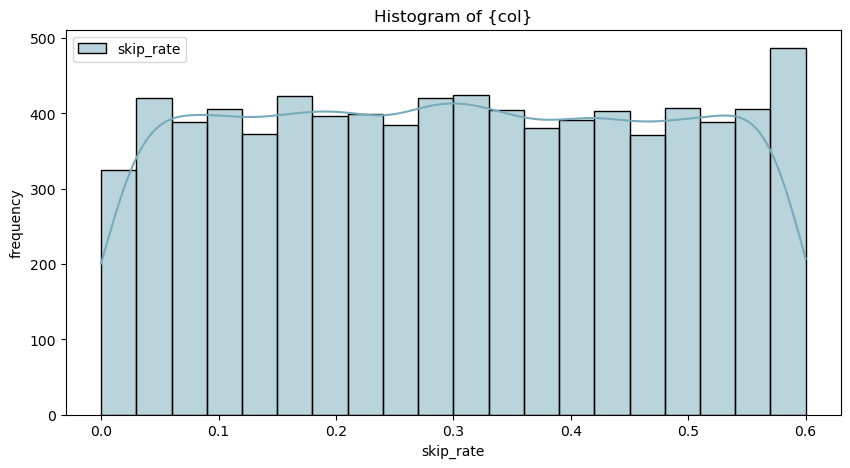

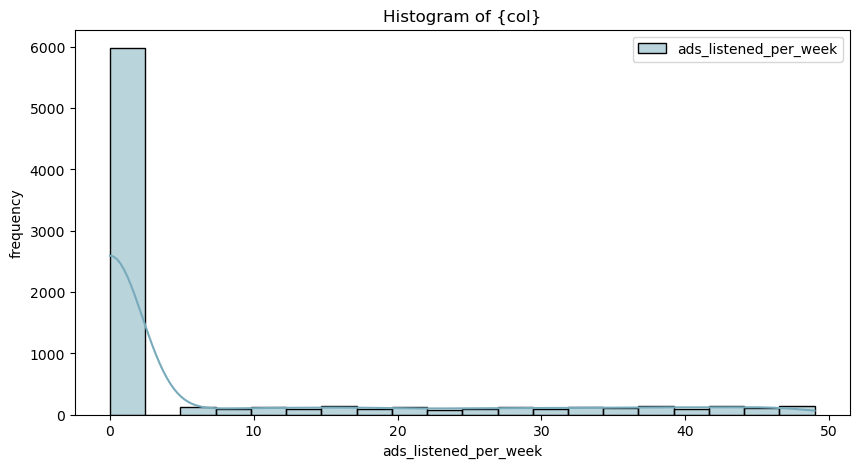

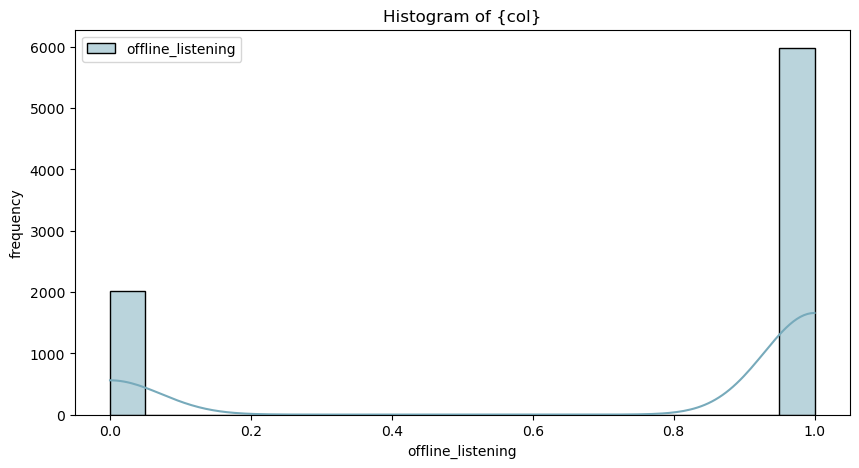

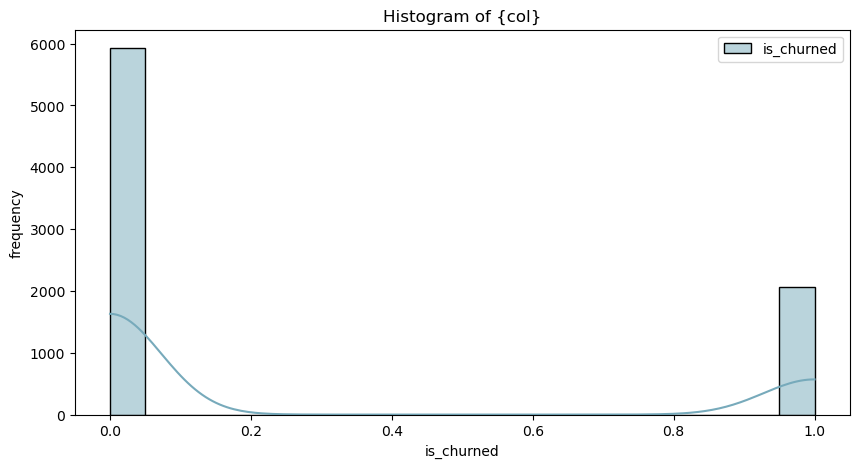

In [34]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='blend:#7AB,#EDA', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

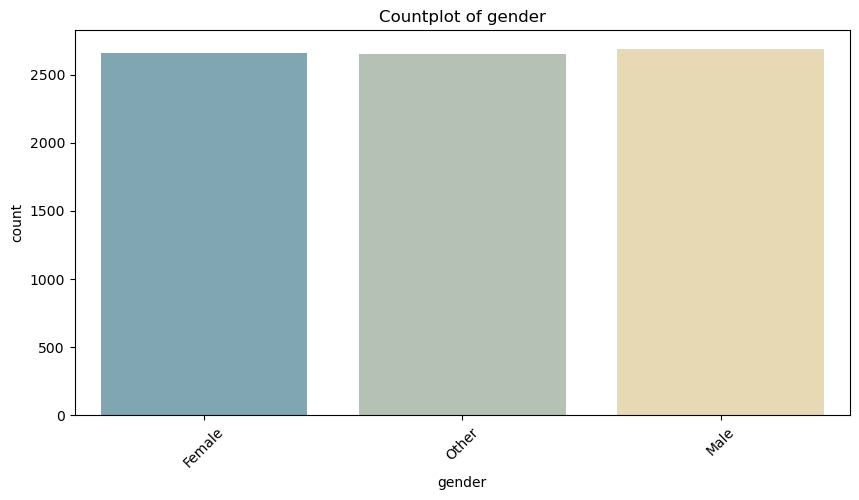

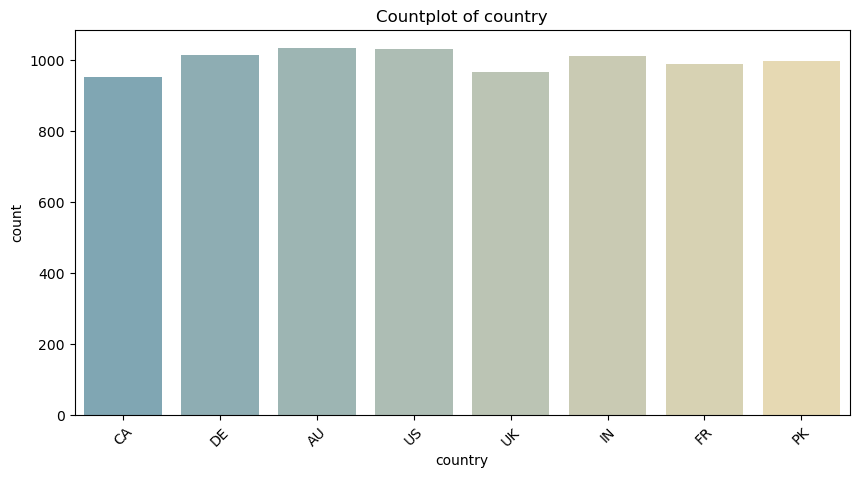

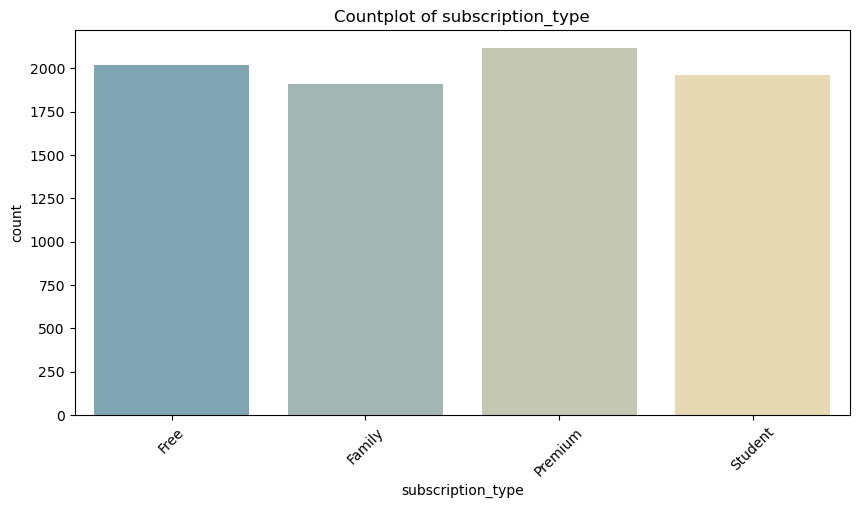

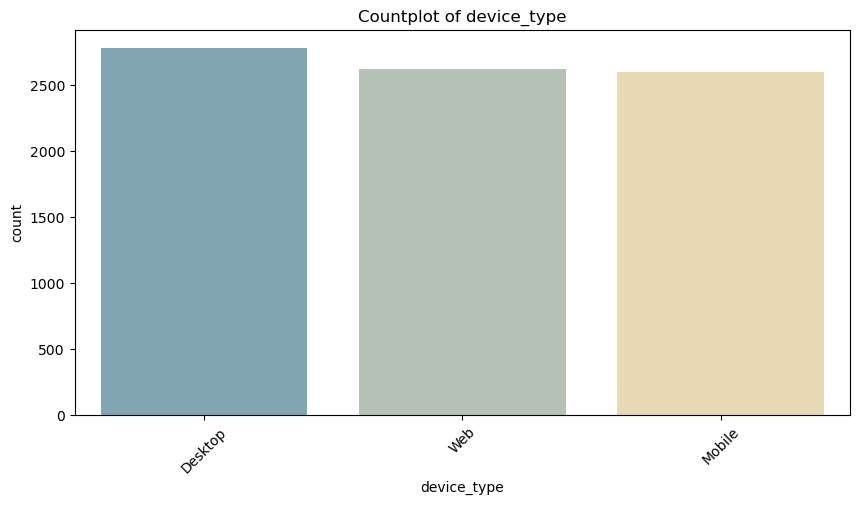

In [35]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='blend:#7AB,#EDA')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Top Subscription Type

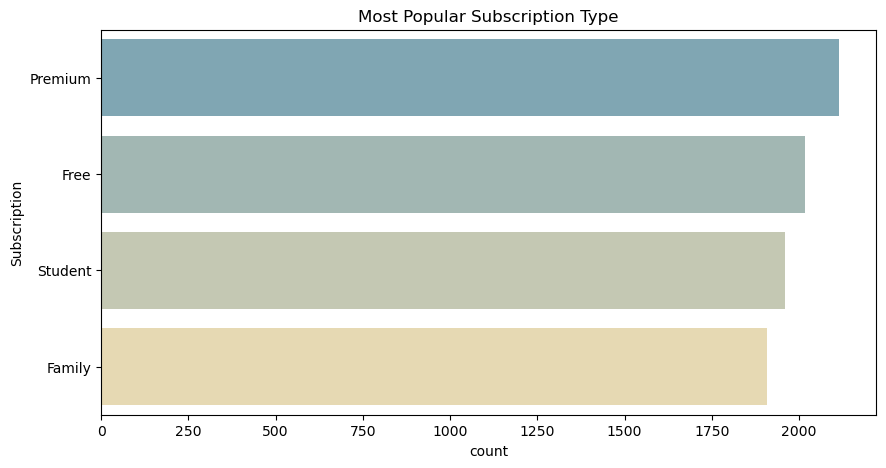

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['subscription_type'], order=df['subscription_type'].value_counts().index, palette='blend:#7AB,#EDA')
plt.title('Most Popular Subscription Type')
plt.xlabel('count')
plt.ylabel('Subscription')
plt.show()

### 4. Top Device Type

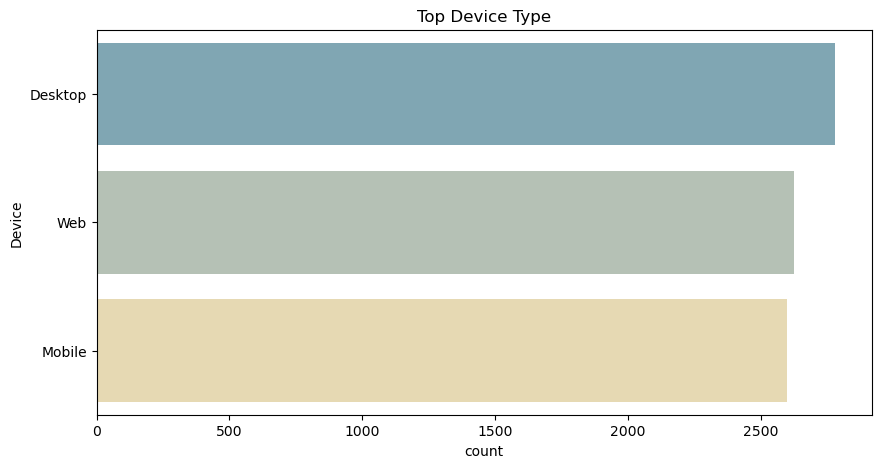

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['device_type'], order=df['device_type'].value_counts().index, palette='blend:#7AB,#EDA')
plt.title('Top Device Type')
plt.xlabel('count')
plt.ylabel('Device')
plt.show()

### 5. Subscription Type vs. Songs Played Per Day

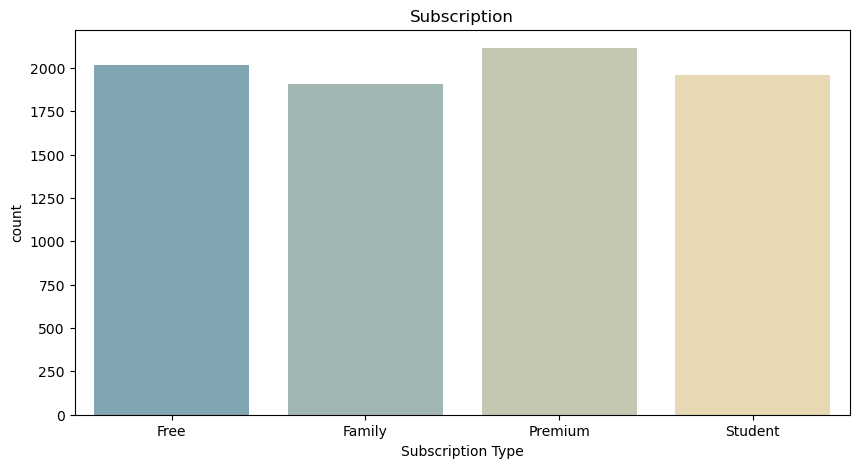

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['subscription_type'], palette='blend:#7AB,#EDA')
plt.title('Subscription')
plt.xlabel('Subscription Type')
plt.ylabel('count')
plt.show()

### 6. Device Type & Subscription Type vs Listening Time

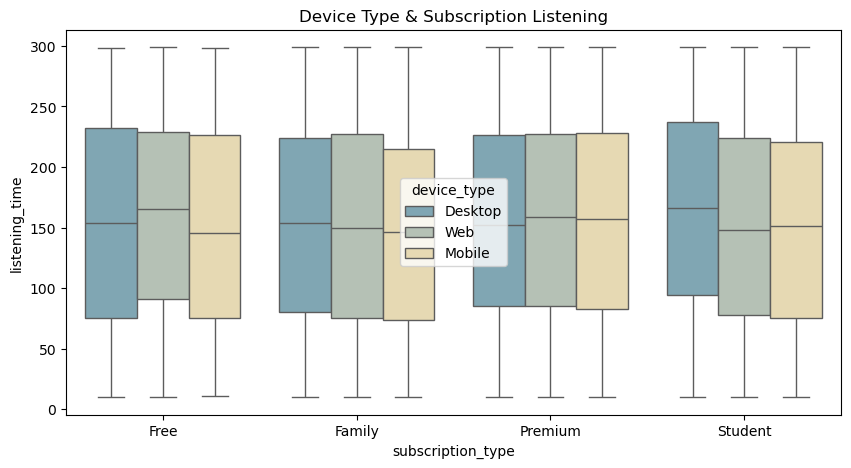

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='subscription_type', y='listening_time', hue='device_type', palette='blend:#7AB,#EDA')
plt.title('Device Type & Subscription Listening')
plt.show()

### 7. Device Type By Skip Rate

In [36]:
device_skip_rate = df.groupby('device_type')['skip_rate'].sum()

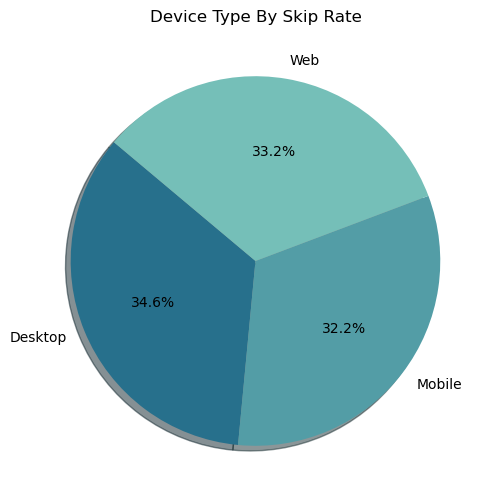

In [37]:
plt.figure(figsize=(12, 6))
plt.pie(device_skip_rate, labels=device_skip_rate.index, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)
plt.title('Device Type By Skip Rate')
plt.show()

### 8. Country By Skip Rate

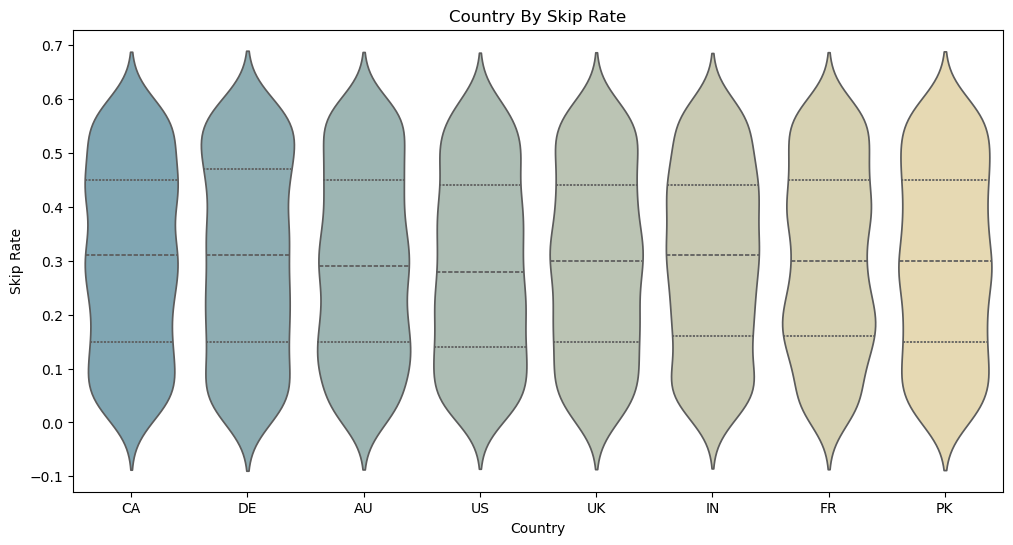

In [39]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='skip_rate', data=df, palette='blend:#7AB,#EDA', inner='quartile')
plt.title('Country By Skip Rate')
plt.xlabel('Country')
plt.ylabel('Skip Rate')
plt.show()

In [40]:
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


## Predictive Modeling

### 1. Train Test Split

In [45]:
df['gender'].unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [47]:
df['country'].unique()

array(['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'], dtype=object)

In [48]:
df['subscription_type'].unique()

array(['Free', 'Family', 'Premium', 'Student'], dtype=object)

In [49]:
df['device_type'].unique()

array(['Desktop', 'Web', 'Mobile'], dtype=object)

In [50]:
df = df.drop(['user_id'], axis=1)

In [51]:
val = {'device_type': {'Desktop': 0, 'Web': 1, 'Mobile': 2}, 
       'subscription_type': {'Free': 0, 'Premium': 1, 'Family': 2, 'Student': 3},
       'gender': {'Female': 0, 'Male': 1, 'Other': 2},
       'country': {'CA': 0, 'DE': 1, 'AU': 2, 'US': 3, 'UK': 4, 'IN': 5, 'FR': 6, 'PK': 7}
       }
df.replace(val, inplace=True)
df

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,0,54,0,0,26,23,0.20,0,31,0,1
1,2,33,1,2,141,62,0.34,1,0,1,0
2,1,38,2,1,199,38,0.04,2,0,1,1
3,0,22,0,3,36,2,0.31,2,0,1,0
4,2,29,3,2,250,57,0.36,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7995,2,44,1,3,237,36,0.30,2,0,1,1
7996,1,34,2,1,61,64,0.59,2,0,1,0
7997,0,17,3,0,81,62,0.33,0,5,0,0
7998,0,34,5,3,245,94,0.27,0,0,1,0


In [52]:
features = ['gender', 'age', 'subscription_type','songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']
target = 'is_churned'

X = df[features]
y = df[target]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(6400, 7) (1600, 7)


### 2. Models

In [54]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [55]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.75

 Decison Tree Accuracy: 0.5975

 Random Forest Accuracy: 0.714375

 Gradient Boosting Accuracy: 0.74875

 K-Nearest Neighbors Accuracy: 0.695625

 Support Vector Machine Accuracy: 0.75


#### Best Model

In [56]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.75


### 3. Classification Report

In [57]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1200
           1       0.00      0.00      0.00       400

    accuracy                           0.75      1600
   macro avg       0.38      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600



### 4. Confusion Matrix

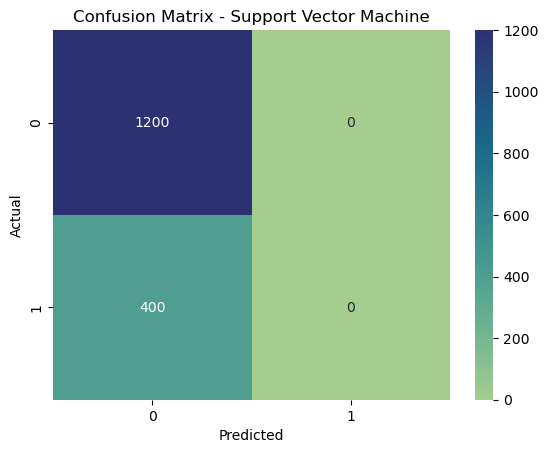

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()